# 1. Imports

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Carregar os dados

In [29]:
df = pd.read_csv('datagymbox.csv')

# 3. Tratamento de dados

In [30]:
# Converta a coluna de data e hora para datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y %H:%M:%S')

# Crie colunas para a hora do dia e o dia da semana
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day_name()

df_weekdays = df[df['day'] != 'Saturday']
df_saturday = df[df['day'] == 'Saturday']

df_hour_weekdays = df_weekdays.groupby('hour').agg({'rssi': 'mean', 'id': 'count'})
df_hour_saturday = df_saturday.groupby('hour').agg({'rssi': 'mean', 'id': 'count'})

# Agrupe os dados
df_hour = df.groupby('hour').agg({'rssi': 'mean', 'id': 'count'})
df_day = df.groupby('day_of_week').agg({'rssi': 'mean', 'id': 'count'})

print(df_saturday)


                                          id                mac  rssi   
101133  b2f5d119-b05e-4ee4-8384-a680663309b6  00:0c:e7:00:d8:53   -87  \
101134  f7e6910a-c000-4f9b-8442-52752d28fe97  00:0c:e7:02:a5:e9   -91   
101135  6944795f-6942-4288-9149-ab4593f2b27a  00:0c:e7:08:13:bc   -73   
101136  f3194a44-738b-4ad6-93a6-a32d9dad14c6  00:0c:e7:0b:99:69   -87   
101137  a8b940ce-37ce-4ae8-a854-ea73d6167870  00:0c:e7:21:d8:48   -86   
...                                      ...                ...   ...   
129229  c25b0cd0-a2c1-4f0e-b8d1-ffe4a4b1b036  fe:ff:0a:92:32:2b   -90   
129230  66c9602e-fdac-43c4-b6ee-6236c8469f70  fe:ff:0a:92:32:2b   -86   
129231  0bd122de-ecdc-4d6e-a337-7c6e3a33f4c2  fe:ff:0a:92:32:2b   -87   
129232  a15f9cbe-54c9-4240-af89-a2dbaea12615  fe:ff:d3:e0:b4:52   -83   
129233  a2c2614f-3932-479b-8f49-ea26a82864e7  fe:ff:d3:e0:b4:52   -77   

                 timestamp  hour  day_of_week       day  
101133 2023-05-06 15:50:40    15            5  Saturday  
101134 

# 4. Visualização dos dados

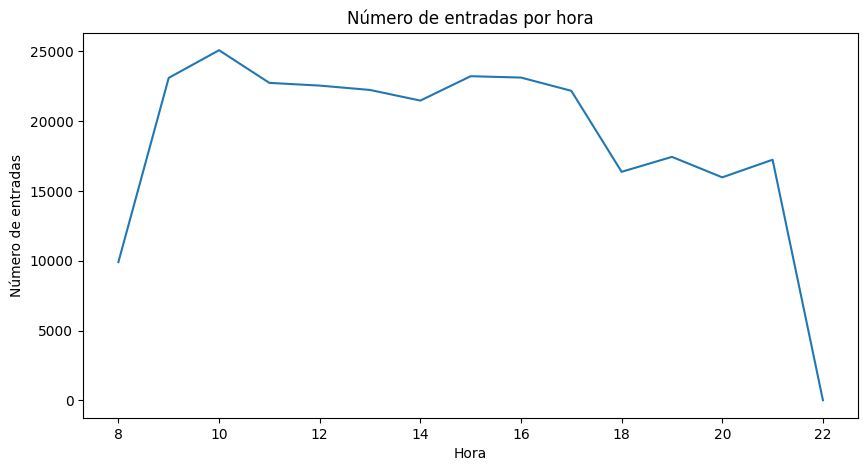

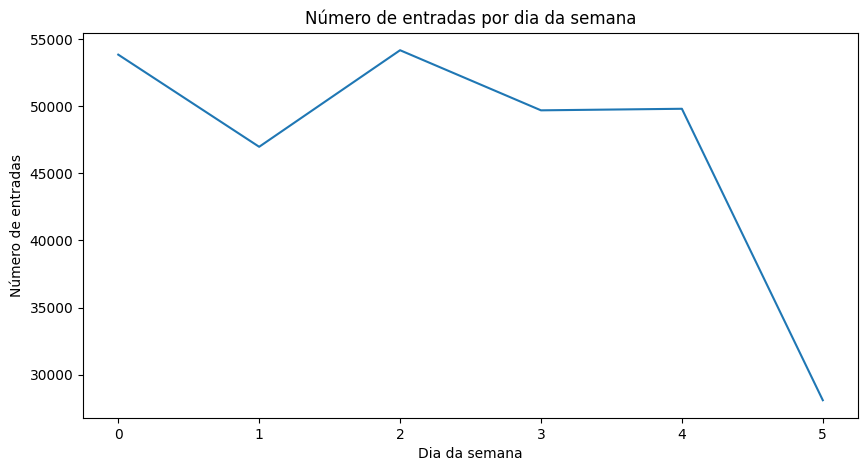

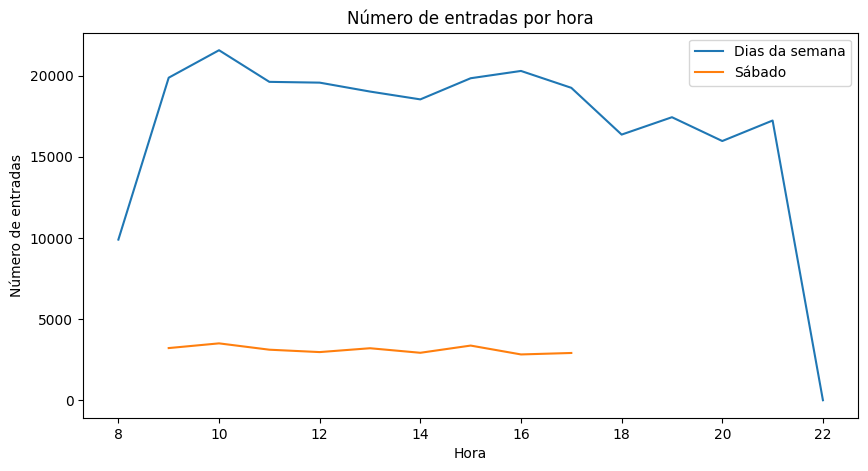

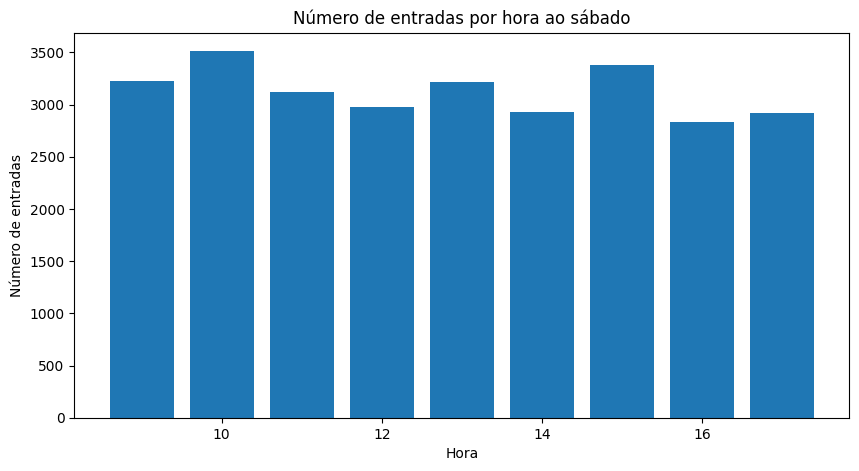

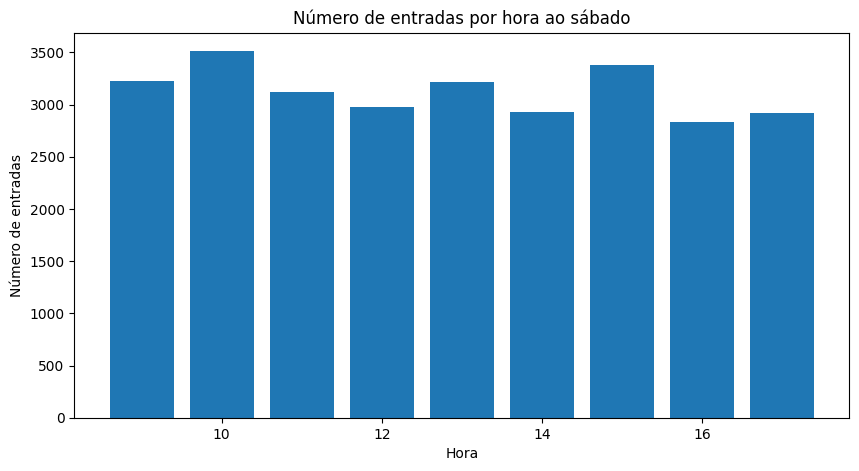

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(df_hour['id'])
plt.title('Número de entradas por hora')
plt.xlabel('Hora')
plt.ylabel('Número de entradas')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_day['id'])
plt.title('Número de entradas por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Número de entradas')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_hour_weekdays['id'], label='Dias da semana')
plt.plot(df_hour_saturday['id'], label='Sábado')
plt.title('Número de entradas por hora')
plt.xlabel('Hora')
plt.ylabel('Número de entradas')
plt.legend()
plt.show()

# Agrupe os dados de sábado por hora e conte o número de entradas
df_hour_saturday = df_saturday.groupby('hour').agg({'id': 'count'})

# Crie o histograma
plt.figure(figsize=(10, 5))
plt.bar(df_hour_saturday.index, df_hour_saturday['id'])
plt.title('Número de entradas por hora ao sábado')
plt.xlabel('Hora')
plt.ylabel('Número de entradas')
plt.show()
